In [ ]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; padding: 0px;}
.container {width:95% !important;}
</style>

In [ ]:
%autosave 0

# Referencias

Teoría de aprendizaje reforzado
- Sutton & Barto, ["Reinforcement Learning: An Introduction", MIT Press, 2nd ed, 2018](http://www.incompleteideas.net/book/the-book.html)
- David Silver (DeepMind), ["Reinforced Learning Course"](https://www.youtube.com/watch?v=2pWv7GOvuf0&list=PLqYmG7hTraZDM-OYHWgPebj2MfCFzFObQ)

Aprendizaje reforzado con redes neuronales
- Lex Friedman (MIT), ["Introduction to Deep Reinforced Learning"](https://www.youtube.com/watch?v=zR11FLZ-O9M&t=900s)
- Alexander Amini (MIT), ["Deep Reinforced Learning"]()


# Aprendizaje Supervisado 

Tenemos **ejemplos etiquetados** $(x, y)$ 

> Buscamos un mapeo $f_\theta : x \to y$

el cual aprendemos optimizando una **función de costo**, *e.g.*

$$
\min_w \sum_{i=1}^N y_i \log (\hat y_i) \quad \hat y_i = f_\theta (x_i)
$$
<br>

<div>
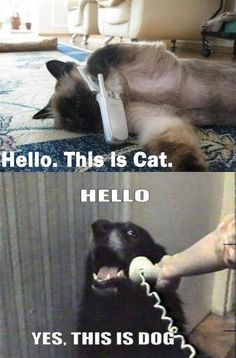
</div>

# Aprendizaje No Supervisado 

Tenemos **ejemplos sin etiqueta** $(x)$ 

> Buscamos una representación de los datos 

la cual aprendemos optimizando una **función de costo**, *e.g.*

$$
\min  \sum_{i=1}^N \sum_{k=1}^K w_{ik} \|x_i - \mu_k\|^2 \quad w_{ik} = \begin{cases} 1 & k = \text{arg}\min_j \| x_i - \mu_j\|^2 \\ 0 & \sim \end{cases} 
$$ 

<br>
<div>
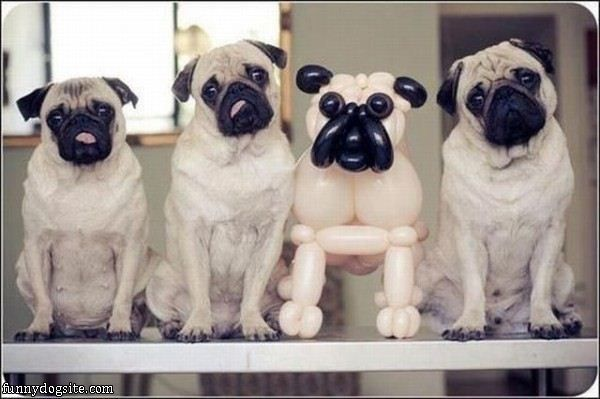
</div>

# Aprendizaje Reforzado (RL)

El problema fundamental de RL es 

> **aprender** a tomar la mejor **decisión** en un **ambiente** cambiante

¿Quién toma las decisiones?

> El sistema que toma las decisiones e interactua con el ambiente se llama **agente**

¿Cómo se cual es la mejor decisión?

> La mejor decisión es aquella que obtiene mayor **recompensa**

<br>
<div>
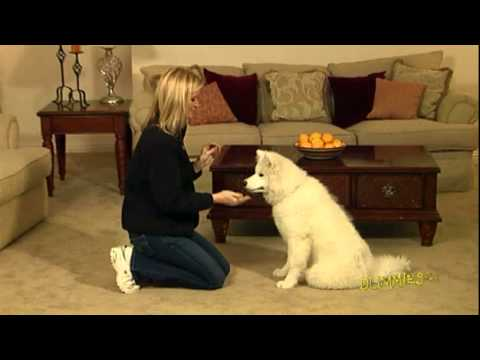
</div>

Esto supone diferencias importantes con los paradigmas de Machine Learning anteriores

Definamos estos componentes resaltando las diferencias

#### Ambiente y Estado

En lugar de ejemplos existe un **ambiente o mundo** el cual podemos observar

Nuestra perceción del ambiente no siempre es completa

El ambiente se representa por un vector denominado **estado**

#### Acciones

El agente no retorna predicciones sino que toma **decisiones**

En cada instante el agente escoge y realiza una **acción**

Existen **consecuencias**, las acciones realizadas pueden modificar el ambiente

#### Recompensa

La retroalimentación del agente no proviene de etiquetas sino de una **señal numérica escalar llamada recompensa**

La recompensa está asociada a uno o más estados

La recompensa puede ser positiva o negativa



#### Diferencias clave

- Supervisión: Al agente no se le dice que acción es buena, sino que estados son buenos

- Prueba y error: El agente debe descubrir que acción le entrega la mayor recompensa probándolas una a una

- Temporalidad: El entrenamiento y la ejecución son secuenciales, no se puede asumir iid

- Retraso en la retroalimentación: Las recompensas pueden demorar en llegar, las acciones pueden no traer recompensa inmediata pero si en el futuro



### Objetivo del agente

> Seleccionar acciones para maximizar la **recompensa acumulada futura**

En ciertos casos podría ser mejor abandonar una recompensa intermedia en pos de obtener una mayor recompensa final

### Hipótesis de recompensa

> Todo objetivo puede ser representado mediante la maximización de la recompensa acumulada esperada



### La vida de una gente

> Un agente de RL debe tener objetivos, debe poder sentir su ambiente y debe ser capaz de actuar sobre el mismo 


Tipicamente asumiremos que el tiempo es discreto $t=0, 1, 2, 3, ...$

En cada tiempo instante $t$ el agente
1. **recibe recompensa del ambiente:** $R_t$
1. **observa el ambiente:** $S_t$
1. **realiza una acción:** $A_t$


o en pseudo-código

    for t in 1, 2, 3, ...., N
        get Rt
        get St
        do At
        
o en diagrama (Sutton & Barto, Fig 3.1):

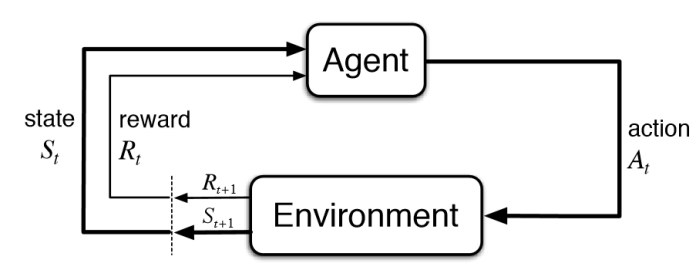

Luego la **historia** de un agente se puede definir como la siguiente trayectoria

$$
H_t = (S_0, A_0, R_1, S_1, A_1, \ldots, R_{t-1}, S_{t-1}, A_{t-1}, R_t, S_t, A_t)
$$

### Discusión

¿Puedes reconocer los agentes, las acciones, el ambiente, la recompensa y demás elementos de RL en los siguientes ejemplos?

¿Se podría resolver este problema usando aprendizaje supervisado? ¿Cuáles serían las limitaciones?

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("60pwnLB0DqY", width=800, height=400)

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("Ev0wpVB7OEs", width=800, height=400)

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("lpi19vExbzc", width=800, height=400)

Ref: Sección 1.2, Sutton & Barto

> Phil prepares his breakfast. Closely examined, even this apparently mundane
activity reveals a complex web of conditional behavior and interlocking goal–subgoal
relationships: walking to the cupboard, opening it, selecting a cereal box, then
reaching for, grasping, and retrieving the box. Other complex, tuned, interactive
sequences of behavior are required to obtain a bowl, spoon, and milk carton. Each
step involves a series of eye movements to obtain information and to guide reaching
and locomotion. Rapid judgments are continually made about how to carry the
objects or whether it is better to ferry some of them to the dining table before
obtaining others. Each step is guided by goals, such as grasping a spoon or getting
to the refrigerator, and is in service of other goals, such as having the spoon to eat
with once the cereal is prepared and ultimately obtaining nourishment. Whether
he is aware of it or not, Phil is accessing information about the state of his body
that determines his nutritional needs, level of hunger, and food preferences.


(Relacionado: https://youtu.be/E2evC2xTNWg)

### Discusión

Considere este [listado de ejemplos de aplicación de RL](https://towardsdatascience.com/applications-of-reinforcement-learning-in-real-world-1a94955bcd12)


¿Qué tienen estos ejemplos en común?

> Interacción entre un agente que toma decisiones y su ambiente

> El agente trata de cumplir una meta a pesar de la incerteza del ambiente

> El agente usa la experiencia que adquiere para mejorar su comportamiento

# El agente en acción

Asumamos que nuestro agente tiene un número limitado de acciones posibles

$$
\mathcal{A} = \{a_1, a_2, a_3, \ldots, a_N\}
$$

En cada instante $t$ el agente escoge una acción en base al estado

La decisión se hace según una función denominada **política** (*policy*)

$$
\pi : \mathcal{S} \to \mathcal{A}
$$

La política es un mapa entre el espacio de estados y el espacio de acciones

#### Política determinista

La política está representada por una función

$$
a = \pi (s)
$$

Ej: Si tengo hambre y el timbre no está sonando apreto el timbre

#### Política estocástica

La política está representada por una distribución

$$
a \sim \pi(A|S) = P(A=a|S=s)
$$

Ej: Si tengo hambre y el timbre no está sonando 
- 9 de 10 veces apreto el timbre
- 1 de 10 veces lo dejo en paz

En promedio apreto el timbre un 90% de las veces que me da hambre

## Discusión: Aspiradora robot

Sea una robo-aspiradora encargada de limpiar nuestra habitación

<div>
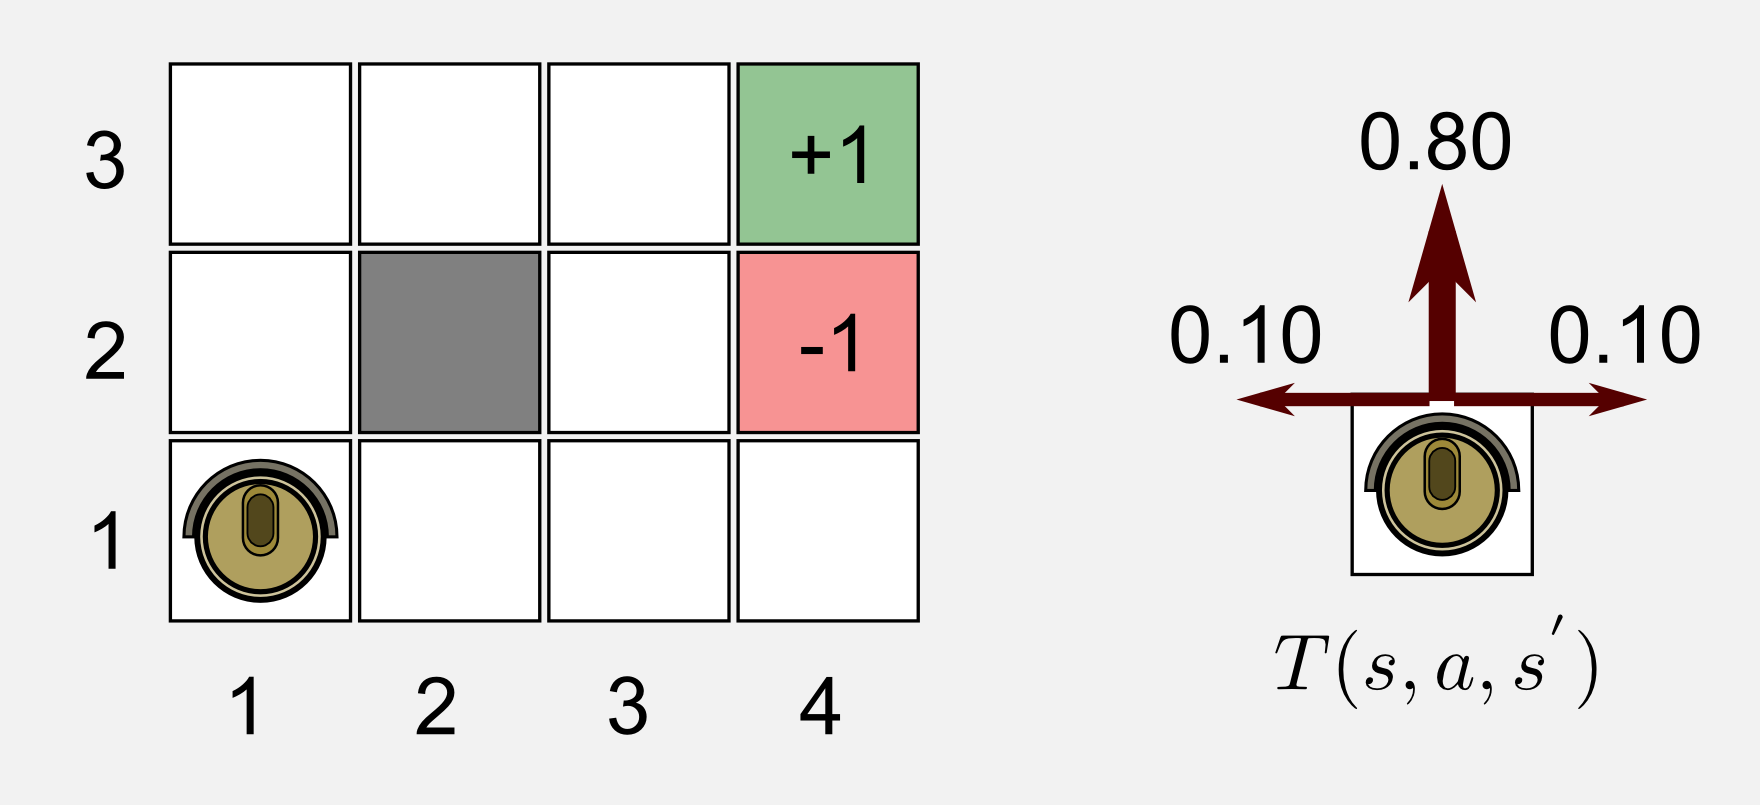
</div>

Nuestra habitación puede discretarse en $3\times 4 = 12$ bloques donde sólo 11 son accesibles por la aspiradora

- La aspiradora parte en el espacio $(1,1)$
- La estación de carga $(4,3)$ tiene una recompensa $+1$
- La escalera $(4, 2)$ tiene una recompensa $-1$
- Todos los demás cuadros tienen una recompensa $-0.04$
- La aspiradora rebota con las paredes y con el obstáculo
- El espacio tiene cuatro acciones, moverse al {N, S, E, O} 

¿Cúal es la mejor política?


Si ahora el ambiente es estocástico
- En un 80% se cumple la acción deseada
- En un 10% se resbala y va a la izquierda de lo que deseaba
- En un 10% se resbala y va a la derecha de lo que deseaba

¿Cúal es la mejor política?


# Política basada en valor

> ¿Cómo se construye una política óptima?

Asumamos que estamos en un instante $t$ en particular

Podemos definir la **recompensa total futura** como

$$
R_t + R_{t+1} + R_{t+2} + R_{t+3} +\ldots 
$$

y diseñar una política para maximizarla, pero

> Problema 1: la recompensa total futura podría diverger

> Problema 2: ambientes no estacionarios e incerteza sobre el futuro

Es más razonable usar una **recompensa total futura descontanda (ganancia)**

$$
\begin{align}
G_t &= R_t + \gamma R_{t+1} + \gamma^2 R_{t+2} + \ldots \nonumber \\
& = \sum_{k=0}^\infty \gamma^k R_{t+k} \nonumber
\end{align}
$$

donde $\gamma \approx 0.99$ es el factor de descuento, que controla la escala de tiempo del aprendizaje del agente

#### Discusión

Asumiendo un mundo ideal donde la inflación no existe y somos seres responsables, ¿Qué es mejor?
- Aceptar una donación de 10.000 pesos ahora
- Aceptar una donación de 10.000 en un año más



# Función Q

En base a $G_t$ podemos escribir la **recompensa total futura esperada** 

$$
Q(s,a) = \mathbb{E}[G_t|S_t=s, A_t=a]
$$

también llamada función **Q** 

> La función Q nos dice cuanta recompensa futura podemos obtener si estamos en el estado $s$ y ejecutamos la acción $a$

Luego una  política determinista basada en Q sería

$$
\pi^*(s) = \text{arg} \max_{a\in \mathcal{A}} Q(s, a)
$$

El objetivo entonces es encontrar **Q**


# Q-Learning

Sea un agente con un conjunto finito de acciones y un ambiente con un conjunto finito de estados

La función Q se representa como una tabla 

| Q     | $a_1$ | $a_2$ | $a_3$ | $a_4$ |
|-------|-------|-------|-------|-------|
| $s_1$ | 0     | 0     | 0     | 0     |
| $s_2$ | 0     | 0     | 0     | 0     |
| $s_3$ | 0     | 0     | 0     | 0     |


Inicialmente la tabla Q está en cero

> El agente se entrena por prueba y error hasta llenar la tabla  $Q(s,a)$

La intuición es que
- realizar una acción en un estado determinado nos da un resultado no deseado: evitar esa acción en ese estado
- realizar una acción en un estado determinado nos da un resultado deseado: preferir esa acción en ese estado
- todas las acciones en un cierto estado producen un resultado no deseado: evitar ese estado
- todas las acciones en un cierto estado producen un resultado deseado: buscar ese estado

Digamos que estamos en el estado $s$ y ejecutamos la acción $a$ obteniendo la recompensa $r(s,a)$ y avanzando al estado $s'$

Con esto podemos redefinir de forma recursiva como 

$$
Q(s, a) = r(s,a) + \gamma \max_{a' \in \mathcal{A}} Q(s', a')
$$

la cual se formaliza con la Ecuación de Bellman

> El valor Q en el estado actual es igual a la recompensa percibida actualmente más el valor descontado del mejor Q alcanzanble en el nuevo estado

Cada vez que realizamos una acción actualizamos 

$$
\begin{align}
Q(s, a) \leftarrow& (1-\alpha)Q(s,a) + \alpha \left(r(s,a) + \gamma \max_{a' \in \mathcal{A}} Q(s', a')\right)  = \nonumber \\
& Q(s,a) + \alpha \left(r(s,a) + \gamma \max_{a' \in \mathcal{A}} Q(s', a') - Q(s,a)\right)
\end{align}
$$

donde $\alpha \in [0, 1]$ es la tasa de aprendizaje


## Ejemplo

# Próximo notebook

- Deep Q-leaning: Aprender Q usando redes neuronales
- Policy gradients: Aprender la política directamente usando redes neuronales
    - Veremos también como extender a espacios de acción continuos

### Desafios en RL

- Cuidar el balance entre la 
    - explotación: El agente ha de explotar lo que sabe para obtener recompensa
    - exploración: El agente debe explorar para poder tomar mejores decisiones en el futuro
- Toma de decisiones secuencial

https://github.com/openai/gym

https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import gym
from IPython import display

env = gym.make("Taxi-v3")
#env = gym.make("CartPole-v1")
#env = gym.make("SpaceInvaders-v0")
env.reset()
#plt.figure(figsize=(9,9), tight_layout=True)
#img = plt.imshow(env.render(mode='rgb_array')) # only call this once

for _ in range(10):
    env.render()
    #img.set_data(env.render(mode='rgb_array')) # just update the data
    #display.display(plt.gcf())
    #display.clear_output(wait=True)    
    action = env.action_space.sample() # Random acction
    observation, reward, done, info = env.step(action)

    if done:
        observation = env.reset()
env.close()

https://metacar-project.com/

https://www.youtube.com/watch?v=zR11FLZ-O9M&list=WL&index=14&t=0s

http://www.cs.us.es/~fsancho/?e=109

https://mpatacchiola.github.io/blog/2016/12/09/dissecting-reinforcement-learning.html

https://medium.com/@curiousily/solving-an-mdp-with-q-learning-from-scratch-deep-reinforcement-learning-for-hackers-part-1-45d1d360c120

https://github.com/aamini/introtodeeplearning/blob/master/lab3/RL.ipynb

# Extra: Procesos de decisión de Markov

El formalismo tras RL se basa en ideas de la teoría de **Sistemas Dinámicos** y en particular de los procesos de decisión de Markov (*Markov Decision Process*) 

El MDP es una reinterpretación de la más conocida **cadena de Markov** (*Markov Chain*)

En una cadena de Markov tenemos un conjunto de estados posibles $\mathcal{S}$ y un modelo de transición $T(s, s')$ que contiene la probablidad de pasar de una estado $s$ a otro $s'$

Además se cumple la **propiedad de Markov**

> El estado futuro es condicionalmente independiente del pasado dado presente

Que matematicamente, para un instante $t$ sería

$$
p(s_{t+1}| s_t, s_{t-1}, s_{t-2}, \ldots, s_2, s_1) = p(s_{t+1}| s_t)
$$

>El estado actual es un estadístico suficiente del futuro

Considere la siguiente cadena de Markov

<br>
<div>
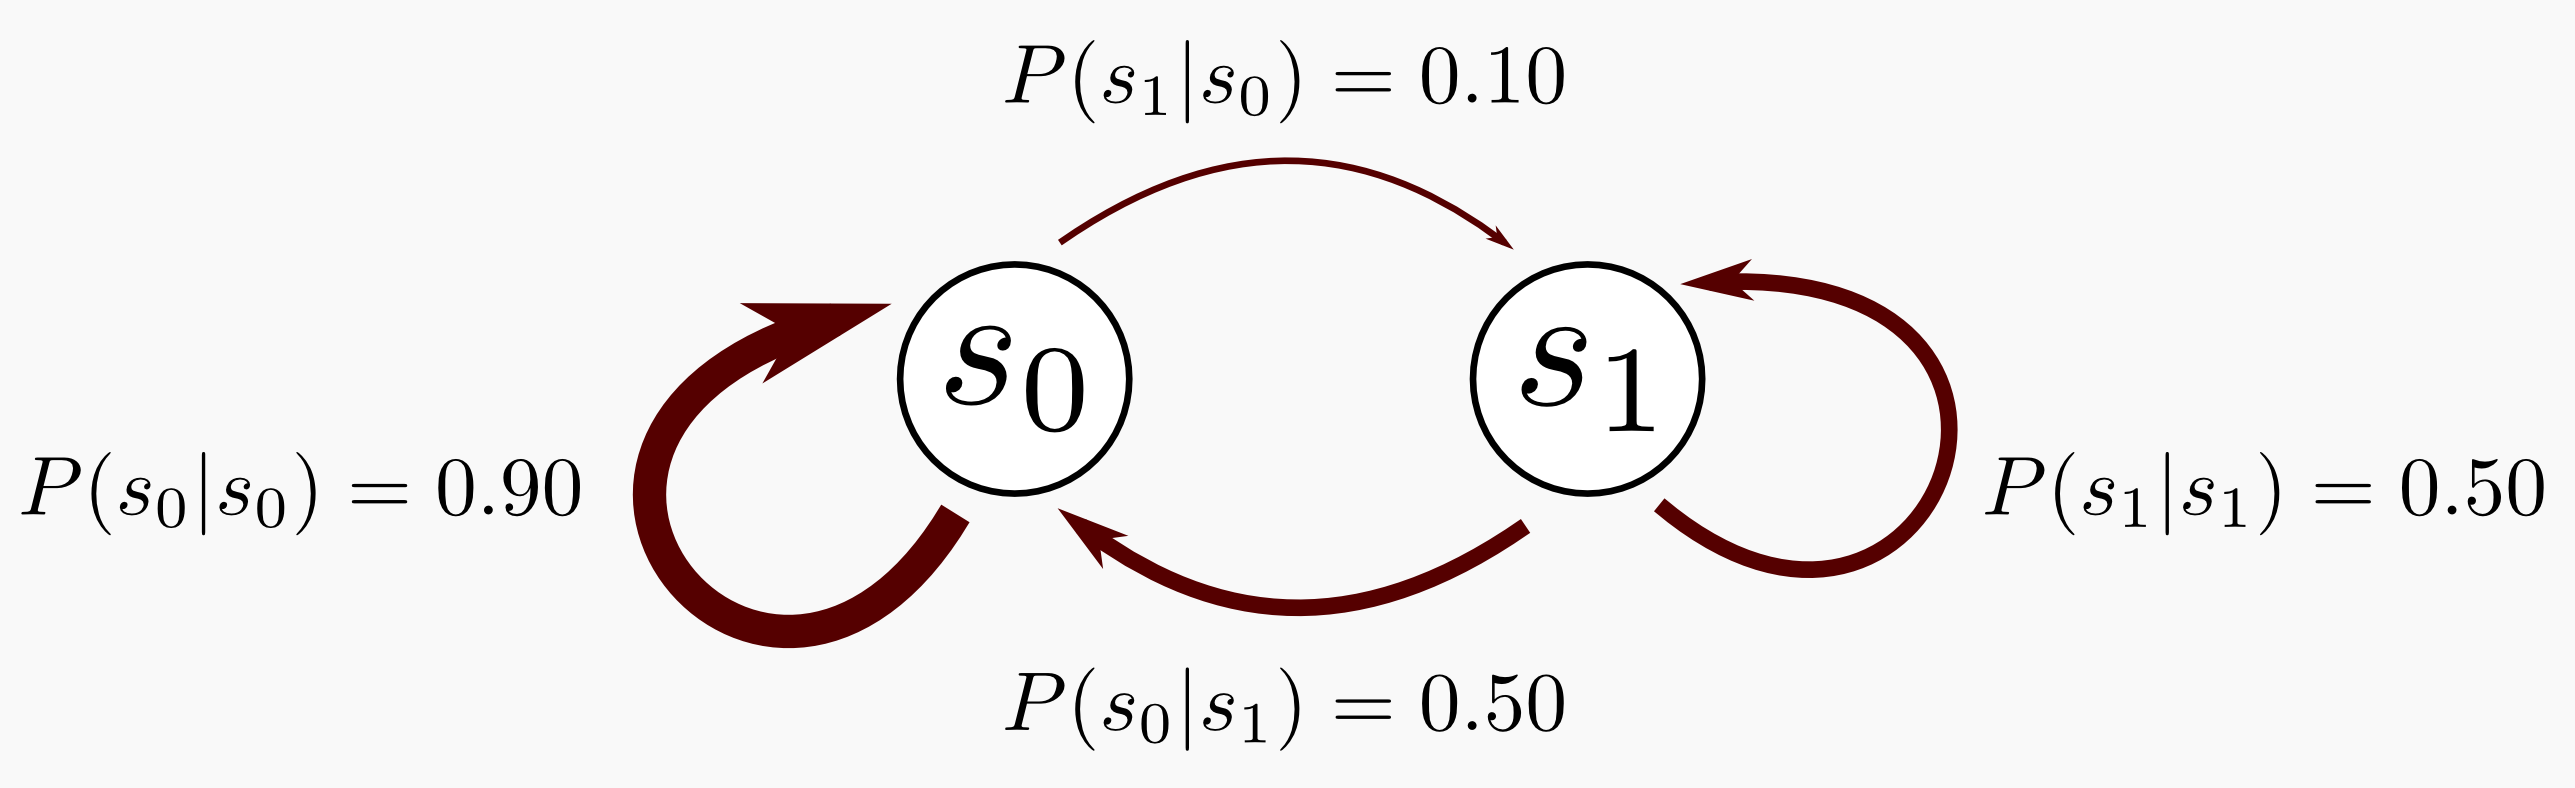
</div>

Esta cadena tiene dos estados y la matriz de transición es

$$
T = \begin{pmatrix} 0.9 & 0.5 \\ 0.1 & 0.5 \end{pmatrix}
$$

Si estoy en el estado $s_0$, ¿dónde estaré en tres iteraciones más?

In [ ]:
import numpy as np 

s = np.array([1, 0])
T = np.array([[0.9, 0.5],[0.1, 0.5]])

np.dot(np.linalg.matrix_power(T, 3), s)

Con un 84% de pbb estaré en $s_0$ mientras que con un 16% estaré en $s_1$

¿Puedes explicar de dónde sale este resultado?

#### En el caso del MDP

En este caso hay un conjunto de estados posibles $\mathcal{S}$, un conjunto de acciones posibles $\mathcal{A}$, una función de recompensa $R(s)$ y una modelo de transición $T(s, a, s')$

Ahora el modelo se interpreta como la probabilidad de llegar a $s'$ si estaba en $s$ y ejecuté $a$

Dado el estado y la acción actual, el proximo estado no depende del pasado: **Propiedad de Markov**

Con el MDP se busca modelar 
- relaciones de causa y efecto
- existencia de objetivos explicitos
- incertidumbre y no-determinismo